In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data

In [6]:
t_dataset = pd.read_csv("T_data_mean.csv")
t_dataset

,nSub,nARC,thARC,T_mean,T_SD
0,3.0,3.5,0.2,0.726103,0.007049
1,3.0,3.5,0.4,0.677899,0.015610
2,3.0,3.5,0.6,0.643309,0.011100
3,3.0,3.5,0.8,0.641478,0.010056
4,3.0,3.5,1.0,0.670168,0.031222
...,...,...,...,...,...
1674,5.0,5.0,0.2,0.555554,0.000005
1675,5.0,5.0,0.4,0.555533,0.000059
1676,5.0,5.0,0.6,0.554505,0.001815
1677,5.0,5.0,0.8,0.555558,0.000040


In [7]:
t_dataset.isnull().sum()

nSub       0
nARC       0
thARC      0
T_mean     0
T_SD      14
dtype: int64

In [8]:
x_data = t_dataset.drop("T_mean", axis = 1, inplace = False)
x_data = x_data.drop("T_SD", axis = 1, inplace = False)

y_data = t_dataset["T_mean"]

y_data

0       0.726103
1       0.677899
2       0.643309
3       0.641478
4       0.670168
          ...   
1674    0.555554
1675    0.555533
1676    0.554505
1677    0.555558
1678    0.555537
Name: T_mean, Length: 1679, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 2)

In [10]:
print('t_train_x',x_train.shape)
print('t_train_y',y_train.shape)
print('t_test_x',x_test.shape)
print('t_test_y',y_test.shape)

t_train_x (1175, 3)
t_train_y (1175,)
t_test_x (504, 3)
t_test_y (504,)


In [11]:
# Loss function
def MSE(real, predict):
    error = ((real-predict)**2).mean()
    
    return error

# Linear Regression

## Model

Mean Squared Error: 0.018440607369028476
0.32238161593364334
0.33328504081879406


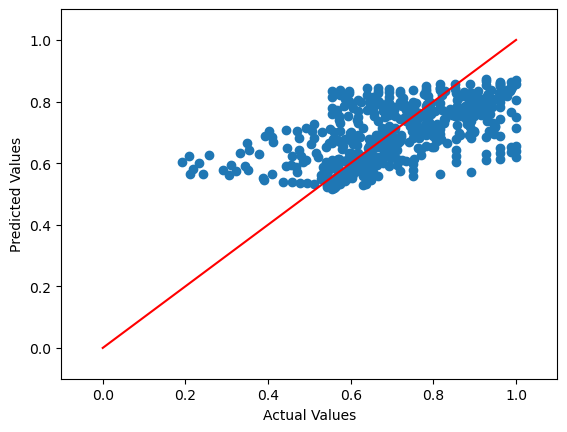

In [12]:
reg = LinearRegression()
reg.fit(x_train, y_train)

reg_pred = reg.predict(x_test)

# 모델 평가
mse = MSE(y_test, reg_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.scatter(y_test,reg_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Ridge

## Model

Mean Squared Error: 0.018440614851036492
0.32238161590846903
0.3332847703089038


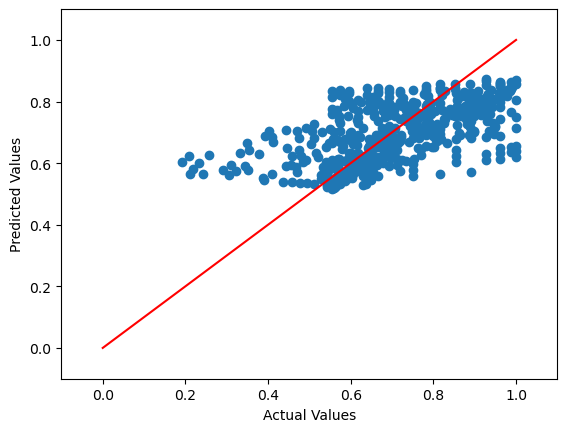

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(x_train, y_train)

ridge_pred = ridge.predict(x_test)

# 모델 평가
mse = MSE(y_test, ridge_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))
plt.scatter(y_test,ridge_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

## Optimize

In [14]:
from bayes_opt import BayesianOptimization

def train_acc(alpha):
    
    ridge_final = Ridge(alpha=alpha)
    ridge_final.fit(x_train, y_train)
    
   # Validation
    y_pred = ridge_final.predict(x_test)
    acc= ridge_final.score(x_test, y_test)
    
    return acc

pbounds = {'alpha': (0.1, 10)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=2,
    allow_duplicate_points=True)

optimizer.maximize(init_points=5 , n_iter= 50) 

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 0.3332    | 4.416     |
| 2         | 0.3333    | 0.3567    |
| 3         | 0.3331    | 5.542     |
| 4         | 0.3332    | 4.41      |
| 5         | 0.3332    | 4.262     |
| 6         | 0.3333    | 0.1007    |
| 7         | 0.3333    | 0.1018    |
| 8         | 0.3333    | 0.1004    |
| 9         | 0.3333    | 0.1008    |
| 10        | 0.3333    | 0.1002    |
| 11        | 0.3333    | 0.1012    |
| 12        | 0.3333    | 0.1008    |
| 13        | 0.3333    | 0.1002    |
| 14        | 0.3333    | 0.1015    |
| 15        | 0.3333    | 0.1002    |
| 16        | 0.3333    | 0.1017    |
| 17        | 0.3333    | 0.1001    |
| 18        | 0.3333    | 0.1003    |
| 19        | 0.3333    | 0.1002    |
| 20        | 0.3333    | 0.1011    |
| 21        | 0.3333    | 0.1003    |
| 22        | 0.3333    | 0.1013    |
| 23        | 0.3333    | 0.1001    |
| 24        | 0.3333    | 0.1003    |
| 25        

Mean Squared Error: 0.018440682291697284
0.3223816134132548
0.3332823320108328


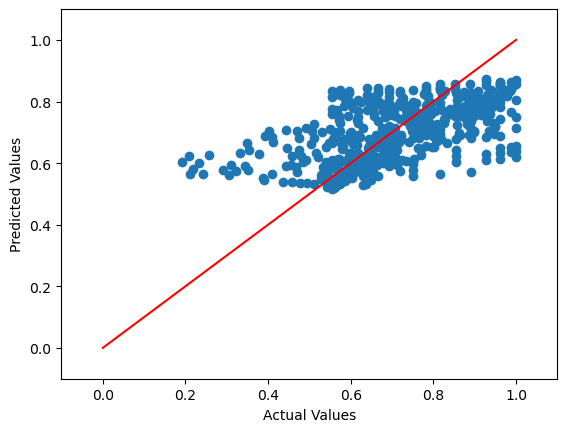

In [15]:
from sklearn.linear_model import Ridge

ridge_final = Ridge(alpha=0.1001)
ridge_final.fit(x_train, y_train)

ridge_final_pred = ridge_final.predict(x_test)

# 모델 평가
mse = MSE(y_test, ridge_final_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(ridge_final.score(x_train, y_train))
print(ridge_final.score(x_test, y_test))
plt.scatter(y_test,ridge_final_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Decision Trees

## Model

Mean Squared Error: 0.0004771941358642099
1.0
0.9827471805864397


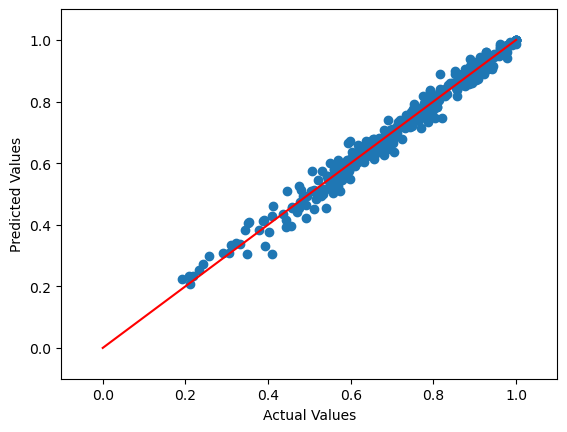

In [16]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)

# 모델 평가
mse = MSE(y_test, dt_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))
plt.scatter(y_test,dt_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

## Optimize

In [19]:
from bayes_opt import BayesianOptimization

def train_acc(max_depth, min_samples_leaf):
    
    dt = DecisionTreeRegressor(max_depth=int(max_depth), min_samples_leaf=int(min_samples_leaf))
    dt.fit(x_train, y_train)
    
   # Validation
    y_pred = dt.predict(x_test)
    acc= dt.score(x_test, y_test)
    
    return acc

pbounds = {'max_depth': (10, 20), 'min_samples_leaf': (1, 4)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1,
    allow_duplicate_points=True)

optimizer.maximize(init_points=5 , n_iter= 50) 

|   iter    |  target   | max_depth | min_sa... |
-------------------------------------------------
| 1         | 0.9632    | 14.17     | 3.161     |
| 2         | 0.9757    | 10.0      | 1.907     |
| 3         | 0.9802    | 11.47     | 1.277     |
| 4         | 0.9717    | 11.86     | 2.037     |
| 5         | 0.9729    | 13.97     | 2.616     |
| 6         | 0.9803    | 11.47     | 1.286     |
| 7         | 0.9757    | 10.84     | 1.268     |
| 8         | 0.982     | 12.13     | 1.0       |
| 9         | 0.982     | 12.83     | 1.0       |
| 10        | 0.9825    | 13.71     | 1.257     |
| 11        | 0.9835    | 14.62     | 1.025     |
| 12        | 0.9829    | 15.62     | 1.0       |
| 13        | 0.9823    | 16.78     | 1.0       |
| 14        | 0.9819    | 16.28     | 1.957     |
| 15        | 0.9824    | 17.6      | 1.955     |
| 16        | 0.982     | 18.28     | 1.002     |
| 17        | 0.9729    | 18.88     | 2.177     |
| 18        | 0.9729    | 17.0      | 2.973     |


In [28]:
print(t_dataset.columns[:-2])
print(t_dataset.columns[-2])

Index(['nSub', 'nARC', 'thARC'], dtype='object')
T_mean


Mean Squared Error: 0.0004695772752930029
0.9999968712706251
0.9830225660324392


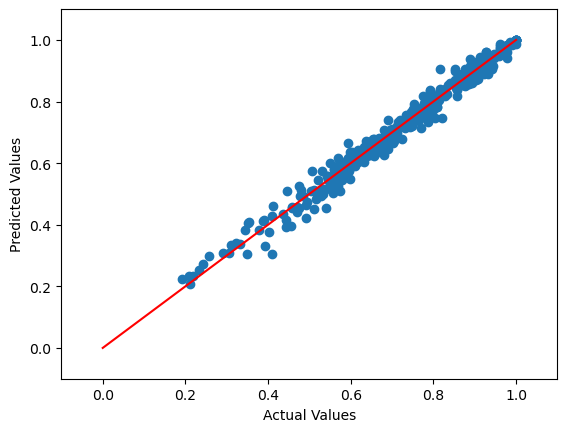

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt_final = DecisionTreeRegressor(max_depth=14, min_samples_leaf=1)
dt_final.fit(x_train, y_train)

dt_final_pred = dt_final.predict(x_test)

# 모델 평가
mse = MSE(y_test, dt_final_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(dt_final.score(x_train, y_train))
print(dt_final.score(x_test, y_test))
plt.scatter(y_test,dt_final_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Random Forest

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Model

Mean Squared Error: 0.0002063946495282285
0.9981334553197517
0.9925378596495392


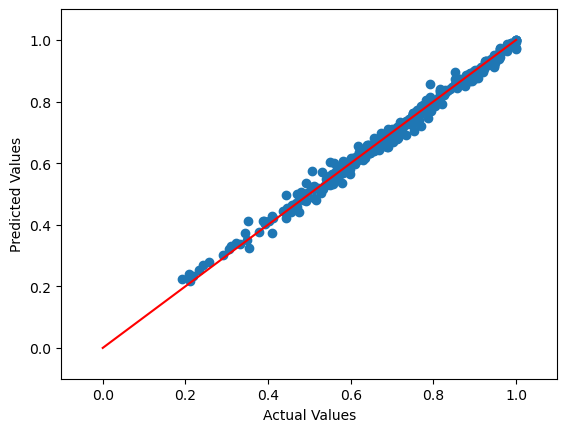

In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
# 모델 평가
mse = MSE(y_test, rf_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))
plt.scatter(y_test,rf_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

## Optimize

In [41]:
from bayes_opt import BayesianOptimization

def train_acc(n_estimators):
    
    rf_final = RandomForestRegressor(n_estimators=int(n_estimators), random_state=2)
    rf_final.fit(x_train, y_train)
    
   # Validation
    y_pred = rf_final.predict(x_test)
    acc= rf_final.score(x_test, y_test)
    
    return acc

pbounds = {'n_estimators': (10, 500)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1)

optimizer.maximize(init_points=5 , n_iter= 50) 

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.9934    | 214.3     |
| 2         | 0.9933    | 363.0     |
| 3         | 0.992     | 10.06     |
| 4         | 0.9933    | 158.1     |
| 5         | 0.9934    | 81.91     |
| 6         | 0.9934    | 212.7     |
| 7         | 0.9933    | 438.7     |
| 8         | 0.9933    | 499.9     |
| 9         | 0.9934    | 301.6     |
| 10        | 0.9933    | 115.6     |
| 11        | 0.9933    | 400.7     |
| 12        | 0.9934    | 267.4     |
| 13        | 0.9934    | 470.5     |
| 14        | 0.9934    | 186.7     |
| 15        | 0.9934    | 331.8     |
| 16        | 0.9934    | 284.0     |
| 17        | 0.9932    | 95.54     |
| 18        | 0.9933    | 62.47     |
| 19        | 0.9933    | 136.5     |
| 20        | 0.9934    | 246.3     |
| 21        | 0.9933    | 381.3     |
| 22        | 0.9934    | 317.0     |
| 23        | 0.9934    | 200.9     |
| 24        | 0.9933    | 420.7     |
| 25        

Mean Squared Error: 0.00019308439451263797
0.9981141213551439
0.9930190881661397


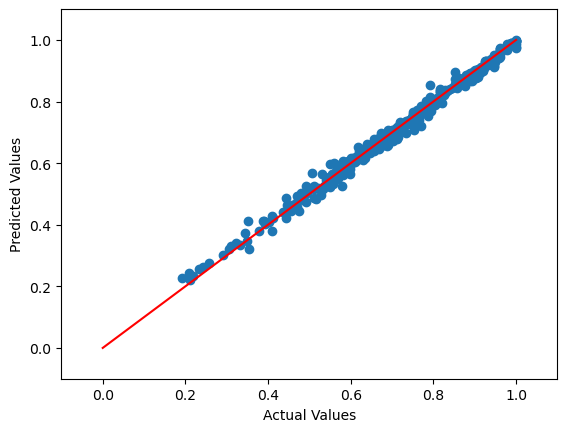

In [42]:
rf_final = RandomForestRegressor(n_estimators=212, random_state=42)
rf_final.fit(x_train, y_train)

rf_final_pred = rf_final.predict(x_test)
# 모델 평가
mse = MSE(y_test, rf_final_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(rf_final.score(x_train, y_train))
print(rf_final.score(x_test, y_test))
plt.scatter(y_test,rf_final_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Neural Networks

## Model

Epoch 1/50
59/59 [==============================] - 1s 4ms/step - loss: 0.1245 - val_loss: 0.0585
Epoch 2/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0464
Epoch 3/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0406 - val_loss: 0.0331
Epoch 4/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0278 - val_loss: 0.0224
Epoch 5/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.0166
Epoch 6/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 7/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0117
Epoch 8/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0081
Epoch 9/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0078
Epoch 10/50
59/59 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0067
Epoch 11/50
59/59 [

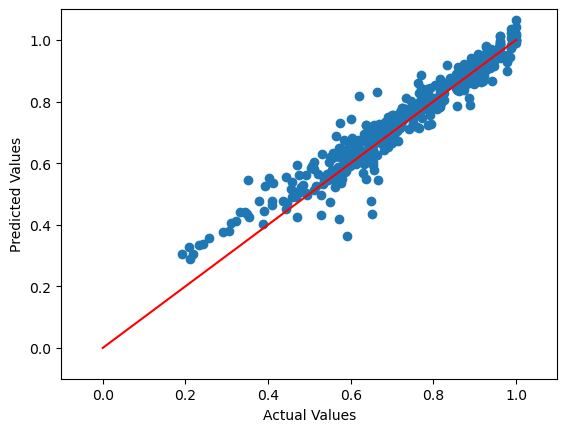

In [21]:
import tensorflow as tf

# 다중 출력을 다루는 신경망 모델 정의
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # 출력 레이어의 뉴런이 1개
])

# 모델 컴파일
nn.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
nn.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

nn_pred = nn.predict(x_test)

# 모델 평가
mse = mean_squared_error(y_test, nn_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

# 작을 수록 더 좋음
print(nn.evaluate(x_train, y_train))
print(nn.evaluate(x_test, y_test))

plt.scatter(y_test,nn_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

## Optimize

In [22]:
from bayes_opt import BayesianOptimization

def train_acc(epochs, batch_size):
    
    # 다중 출력을 다루는 신경망 모델 정의
    nn_final = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # 출력 레이어의 뉴런이 1개
    ])

    # 모델 컴파일
    nn_final.compile(optimizer='adam', loss='mean_squared_error')

    # 모델 훈련
    nn_final.fit(x_train, y_train, epochs=int(epochs), batch_size=int(batch_size), validation_split=0.2, verbose=0)
    
   # Validation
    nn_final_pred = nn_final.predict(x_test)
    acc= nn_final.evaluate(x_test, y_test)
    
    return -acc

pbounds = {'epochs': (10, 100), 'batch_size': (10, 100)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1)

optimizer.maximize(init_points=5 , n_iter= 50) 

|   iter    |  target   | batch_... |  epochs   |
-------------------------------------------------
16/16 [==============================] - 0s 1ms/step - loss: 0.0040
| 1         | -0.003954 | 47.53     | 74.83     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0019
| 2         | -0.001873 | 10.01     | 37.21     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0039
| 3         | -0.003857 | 23.21     | 18.31     |
16/16 [==============================] - 0s 2ms/step - loss: 0.0026
| 4         | -0.002637 | 26.76     | 41.1      |
16/16 [==============================] - 0s 1ms/step - loss: 0.0019
| 5         | -0.001908 | 45.71     | 58.49     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0022
| 6         | -0.00216  | 45.49     | 58.42     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0025
| 7         | -0.002542 | 46.7      | 57.92     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0068
| 8   

16/16 [==============================] - 0s 1ms/step - loss: 0.0026
| 41        | -0.002583 | 12.51     | 22.44     |
16/16 [==============================] - 0s 2ms/step - loss: 0.0038
| 42        | -0.00382  | 93.34     | 51.09     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0031
| 43        | -0.003085 | 89.41     | 85.62     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0055
| 44        | -0.0055   | 65.01     | 82.81     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0019
| 45        | -0.001878 | 15.64     | 57.47     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0020
| 46        | -0.002017 | 40.9      | 67.54     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0050
| 47        | -0.005012 | 75.45     | 31.73     |
16/16 [==============================] - 0s 1ms/step - loss: 0.0036
| 48        | -0.003621 | 77.63     | 87.29     |
16/16 [==============================] - 0s 1ms/step - l

Epoch 1/87
45/45 [==============================] - 1s 4ms/step - loss: 0.1229 - val_loss: 0.0697
Epoch 2/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0674 - val_loss: 0.0521
Epoch 3/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0487 - val_loss: 0.0366
Epoch 4/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.0303
Epoch 5/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0212 - val_loss: 0.0172
Epoch 6/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 7/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0096
Epoch 8/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0080
Epoch 9/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0096
Epoch 10/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0095
Epoch 11/87
45/45 [

Epoch 84/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 85/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 86/87
45/45 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 87/87
16/16 [==============================] - 0s 1ms/step
Mean Squared Error: 0.001124689566608549
37/37 [==============================] - 0s 1ms/step - loss: 0.0012
0.0012099453015252948
16/16 [==============================] - 0s 1ms/step - loss: 0.0011
0.0011246897047385573


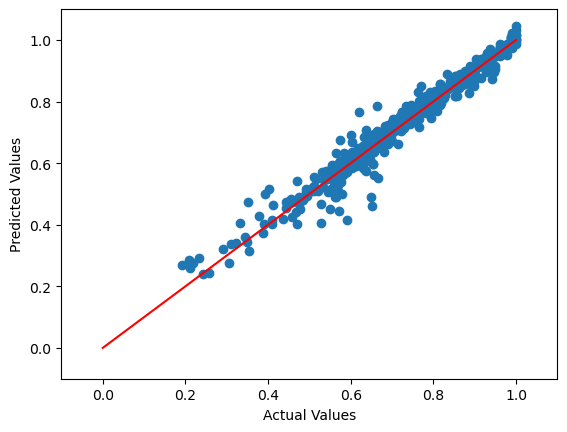

In [23]:
# 다중 출력을 다루는 신경망 모델 정의
nn_final = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # 출력 레이어의 뉴런이 1개
])

# 모델 컴파일
nn_final.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
nn_final.fit(x_train, y_train, epochs=87, batch_size=21, validation_split=0.2)

nn_final_pred = nn_final.predict(x_test)

# 모델 평가
mse = mean_squared_error(y_test, nn_final_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

# 작을 수록 더 좋음
print(nn_final.evaluate(x_train, y_train))
print(nn_final.evaluate(x_test, y_test))

plt.scatter(y_test,nn_final_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Backtracking (thARC)

## Final model

In [25]:
rf_final = RandomForestRegressor(n_estimators=212, random_state=42)
rf_final.fit(x_train, y_train)

nSub, nARC = 3.4, 1.8

RandomForestRegressor(n_estimators=212, random_state=42)

## Bayesian Optimization

In [38]:
from bayes_opt import BayesianOptimization

def train_acc(thARC):
    t_mean = rf_final.predict([[nSub, nARC, thARC]])
    
    return t_mean[0]

pbounds = {'thARC': (0, 1.0)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1,
    allow_duplicate_points=True)

optimizer.maximize(init_points=5 , n_iter= 50)

|   iter    |  target   |   thARC   |
-------------------------------------


NameError: name 'rf_final' is not defined

## Genetic Algorithms

 The best solution found:                                                                           
 [0.05113803]

 Objective function:
 0.697509591287736


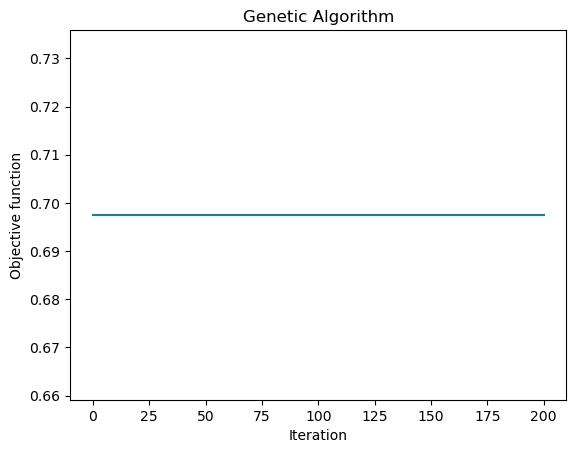

Best Parameters: [0.05113803]
Best Objective Value: -0.697509591287736


In [72]:
from geneticalgorithm import geneticalgorithm as ga

# 목적 함수 (최대화해야 하는 함수)
def objective_function(thARC):
    t_mean = rf_final.predict([[nSub, nARC, thARC]])
    
    return t_mean[0]

# 입력 변수의 탐색 범위를 정의합니다.
varbound = np.array([[0, 1]])

# 유전 알고리즘을 설정합니다.
algorithm_param = {
    'max_num_iteration': 200,   # 최대 반복 횟수
    'population_size': 10,      # 개체 집단 크기
    'mutation_probability': 0.1, # 돌연변이 확률
    'elit_ratio': 0.1,         # 엘리트 비율 (최고의 해를 유지할 개체 비율)
    'crossover_probability': 0.5, # 교차확률
    'parents_portion': 0.3,     # 부모로 선택되는 개체 비율
    'crossover_type': 'uniform', # 교차 방법
    'max_iteration_without_improv': None  # 개선이 없는 최대 반복 횟수 (None으로 설정하면 무제한)
}

# 유전 알고리즘을 실행합니다.
model = ga(function=objective_function, dimension=1, variable_type='real', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)

# 최적의 파라미터를 찾습니다.
model.run()

# 최적의 파라미터와 목적 함수 값 출력
best_params = model.output_dict['variable']
best_objective_value = -model.output_dict['function']
print(f"Best Parameters: {best_params}")
print(f"Best Objective Value: {best_objective_value}")


## Newton-Raphson Method

In [78]:
from scipy.optimize import minimize, approx_fprime

# 목적 함수 (최소화해야 하는 함수)
def objective_function(thARC):
    t_mean = rf_final.predict([[nSub, nARC, thARC]])
    return -t_mean[0]  # 목적 함수를 최소화해야 하므로 음의 값으로 반환

# 목적 함수의 야코비안 (자동으로 계산)
def jac_objective_function(thARC):
    return -approx_fprime(thARC, objective_function, epsilon=1e-8)

# 초기 추정값
initial_guess = np.array([0.92])

# 뉴턴-랩슨 방법을 사용하여 최적화
result = minimize(objective_function, initial_guess, method='Newton-CG', jac=jac_objective_function)

# 최적의 파라미터와 목적 함수 값 출력
best_params = result.x
best_objective_value = -result.fun  # 목적 함수를 최소화해야 하므로 다시 양의 값으로 변환
print(f"Best Parameters: {best_params}")
print(f"Best Objective Value: {best_objective_value}")

Best Parameters: [0.92]
Best Objective Value: 0.9039299274575472


In [34]:
rf_final.predict([[4.0, 1, 0]])

array([0.64001582])